## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from itertools import cycle
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import auc, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical

## Load dataset

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [3]:
new_shape = train_X[0].shape[0] * train_X[0].shape[1]
train_X = train_X / 255
test_X = test_X / 255

In [4]:
train_X = train_X.reshape(train_X.shape[0],
                         new_shape)
test_X = test_X.reshape(test_X.shape[0],
                         new_shape)

In [5]:
train_X.shape

(60000, 784)

In [6]:
_train_y = np.array(train_y)
_train_y = to_categorical(_train_y)

## Create NN

In [7]:
inputs = keras.layers.Input(shape=(train_X.shape[1],), name='input')
outputs = keras.layers.Dense(10, activation='softmax', name='output')(inputs)

In [8]:
neural_net = keras.Model(inputs=[inputs], outputs=[outputs])

In [9]:
neural_net.compile(optimizer=keras.optimizers.SGD(), loss='categorical_crossentropy', metrics=[tf.keras.metrics.AUC()])
neural_net.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 output (Dense)              (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [10]:
train_monitoring = neural_net.fit(x=train_X, y=_train_y, validation_split=.20, shuffle=True, batch_size=64, epochs=100)

Epoch 1/100
750/750 [==============================] - 1s 1ms/step - loss: 1.0803 - auc: 0.9584 - val_loss: 0.6508 - val_auc: 0.9857
Epoch 2/100
750/750 [==============================] - 1s 726us/step - loss: 0.6052 - auc: 0.9850 - val_loss: 0.5045 - val_auc: 0.9887
Epoch 3/100
750/750 [==============================] - 1s 727us/step - loss: 0.5107 - auc: 0.9875 - val_loss: 0.4474 - val_auc: 0.9898
Epoch 4/100
750/750 [==============================] - 1s 734us/step - loss: 0.4649 - auc: 0.9887 - val_loss: 0.4158 - val_auc: 0.9903
Epoch 5/100
750/750 [==============================] - 1s 758us/step - loss: 0.4366 - auc: 0.9893 - val_loss: 0.3956 - val_auc: 0.9908
Epoch 6/100
750/750 [==============================] - 1s 858us/step - loss: 0.4172 - auc: 0.9898 - val_loss: 0.3799 - val_auc: 0.9911
Epoch 7/100
750/750 [==============================] - 1s 886us/step - loss: 0.4025 - auc: 0.9901 - val_loss: 0.3686 - val_auc: 0.9912
Epoch 8/100
750/750 [==============================] - 1s

In [11]:
train_pred_y = neural_net.predict(train_X)
test_pred_y = neural_net.predict(test_X)

313/313 [==============================] - 0s 505us/step


## Metrics

In [12]:
classes = np.unique(test_y).tolist()

In [13]:
test_pred_y = test_pred_y.tolist()
test_pred_y = np.array([np.argmax(pred) for pred in test_pred_y])

train_pred_y = train_pred_y.tolist()
train_pred_y = np.array([np.argmax(pred) for pred in train_pred_y])

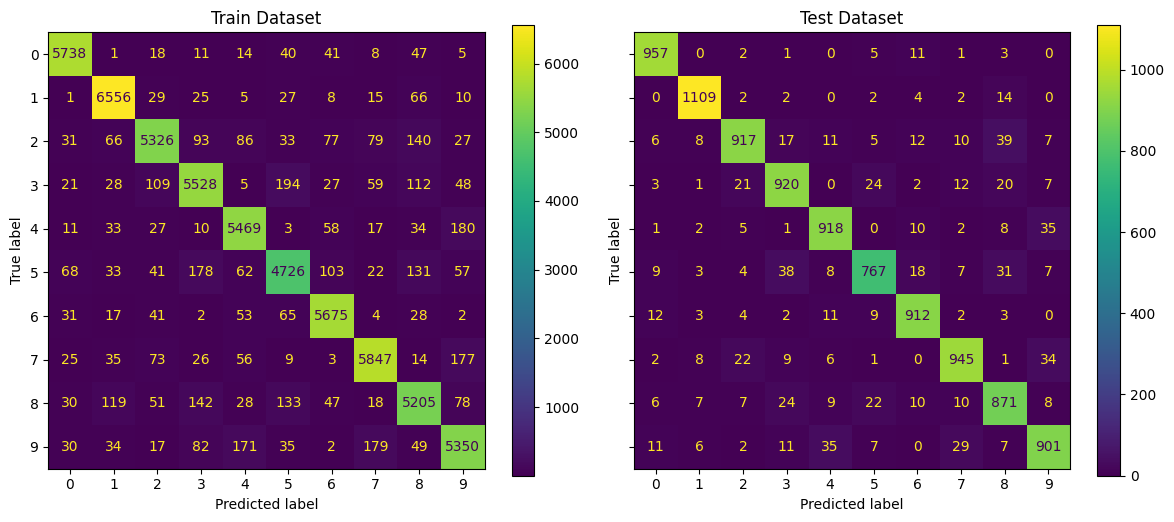

In [14]:
fig, axis = plt.subplots(1, 2, figsize=(12, 5), sharey='row')

cm = confusion_matrix(train_y, train_pred_y, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
axis[0].set_title("Train Dataset")
disp.plot(ax=axis[0])

cm = confusion_matrix(test_y, test_pred_y, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
axis[1].set_title("Test Dataset")
disp.plot(ax=axis[1])

plt.tight_layout()
plt.show()

In [15]:
onehot_encoder = OneHotEncoder(sparse=False)
test_y = test_y.reshape(len(test_y), 1)
test_y = onehot_encoder.fit_transform(test_y)

train_y = train_y.reshape(len(train_y), 1)
train_y = onehot_encoder.fit_transform(train_y)

test_pred_y = test_pred_y.reshape(len(test_pred_y), 1)
test_pred_y = onehot_encoder.fit_transform(test_pred_y)

train_pred_y = train_pred_y.reshape(len(train_pred_y), 1)
train_pred_y = onehot_encoder.fit_transform(train_pred_y)

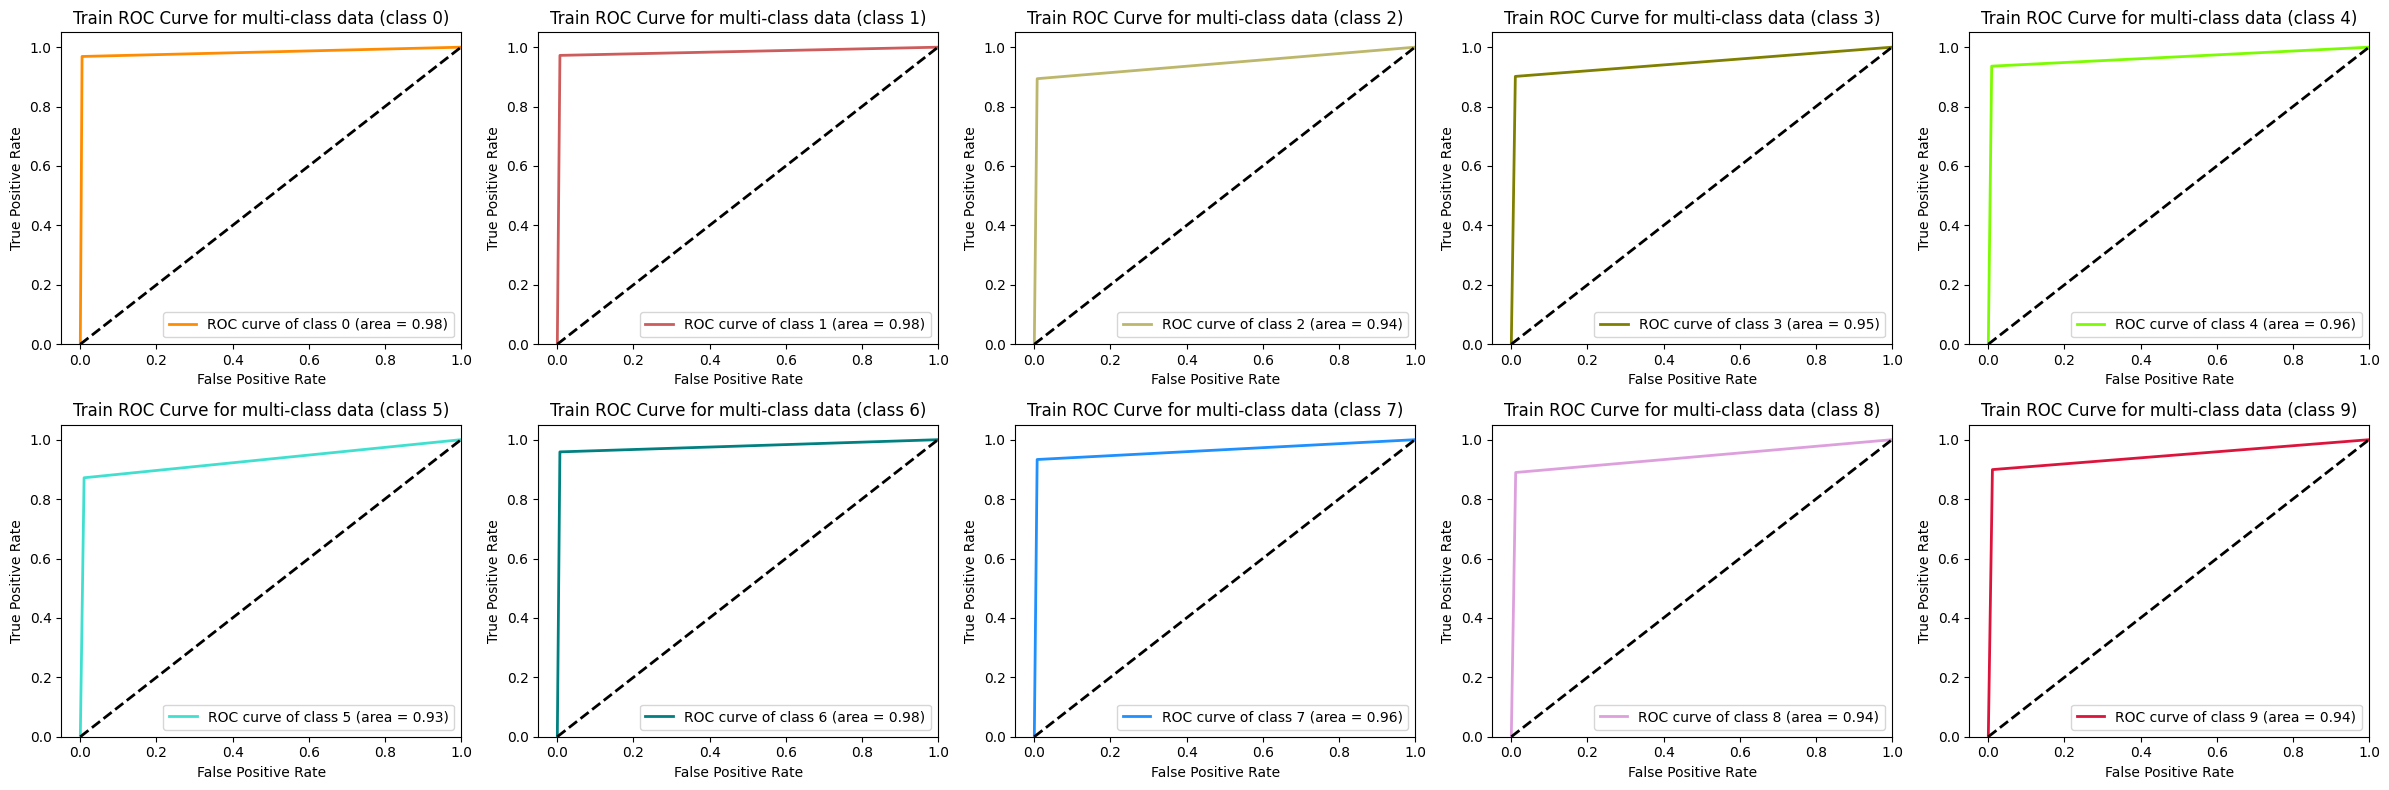

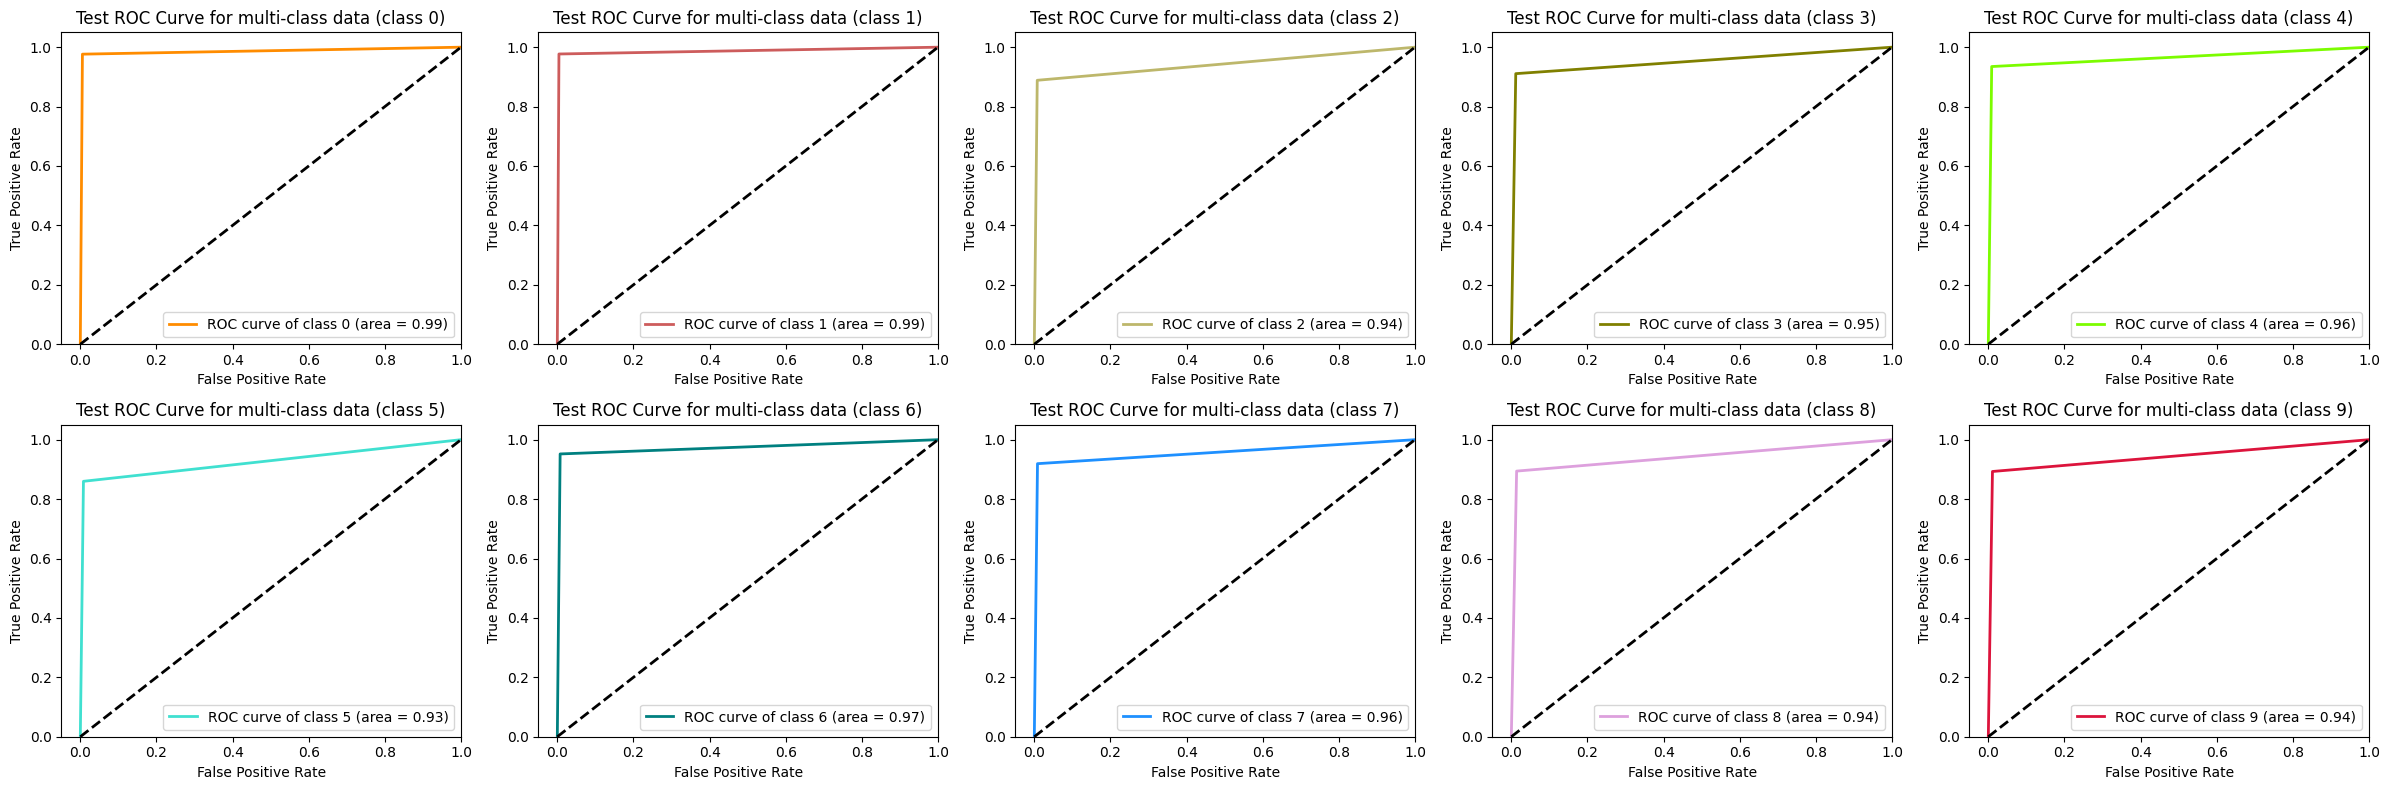

In [24]:
colors = cycle(['darkorange', 'indianred', 'darkkhaki', 'olive', 'lawngreen', 'turquoise', 'teal', 'dodgerblue', 'plum', 'crimson'])


fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(train_y[:, i], train_pred_y[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fig = plt.figure(figsize=(24, 8))
for i, color in zip(range(len(classes)), colors):
    plt.subplot(2, 5, i+1)
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"Train ROC Curve for multi-class data (class {i})")
    plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(test_y[:, i], test_pred_y[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fig = plt.figure(figsize=(24, 8))
for i, color in zip(range(len(classes)), colors):
    plt.subplot(2, 5, i+1)
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"Test ROC Curve for multi-class data (class {i})")
    plt.legend(loc="lower right")
plt.tight_layout()
plt.show()